<center> <h1>
Análisis de ciencia de datos (TC-2004B)
<h4>
<center>César Guillermo Vázquez Alvarez A01197857
<center>IDM - Ingeniería de Ciencia de Datos y Matemáticas

## Entregable Individual Etapa 3

### Índice
1. [**Información General**](#1) 

    - [**Conjunto de datos**](#I1)
    
    - [**Variables relevantes**](#I2)


2. [**Definición de variables**](#2)


3. [**Tipo de modelos**](#3)


4. [**Definición de conjuntos**](#4)


5. [**Implementación de los modelos**](#5)

    5.1. [**Prueba de modelos**](#5.1)
    
    - [**K-Nearest Neighbors**](#M1)
    
    - [**Gaussian Naive-Bayes**](#M2)
    
    - [**Support Vector Machine**](#M3)
    
    - [**Logistic Regression**](#M4)
    
    - [**Decision Tree**](#M5)
    
    - [**Gradient Boosting**](#M6)
    
    - [**Random Forest**](#M7)
    
    - [**Neural Network**](#M8)
    
    5.2. [**Evaluación de modelos**](#5.2)
    
    - [**Accuracy**](#E1)
    
    - [**Matriz de confusión**](#E2)

    - [**Precisión**](#E3)

    - [**Sensitividad**](#E4)

    - [**Especificidad**](#E5)

    - [**ROC-AUC**](#E6)

    5.3. [**Ajuste de hiperparámetros de modelos**](#5.3)

    5.4. [**Validación cruzada de modelos**](#5.4)
    
    
6. [**Conclusión**](#6)

In [1]:
# Quitar Warnings.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 1. Información general <a name='1'></a>

In [2]:
# Importar librerias
import pandas as pd 

# Importar base de datos
data = pd.read_csv("DF.csv", encoding = "utf-8" ) # UTF-8: da el formato que funcionará con los acentos
data = data.drop('Unnamed: 0', axis = 1)


**Conjunto de datos** <a name='I1'></a>

Mostrar la base de datos:

In [3]:
data.head()

,Perfil Pymetrics,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Apto AG,Ingles,Apto,Destacado,Destacado Pym,Ingresados Si/No
0,4,1,2,1,2,0,0,5,0,4.0,1,1,1,1
1,4,1,2,0,0,0,0,5,0,4.0,1,1,1,0
2,1,1,2,2,0,1,2,5,0,4.0,1,1,1,1
3,4,0,0,0,0,0,0,0,0,0.0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Perfil Pymetrics        1050 non-null   int64  
 1   Altamente Recomendado   1050 non-null   int64  
 2   Operaciones-Calidad     1050 non-null   int64  
 3   MTTO-DIMA               1050 non-null   int64  
 4   Comercial-Planeamiento  1050 non-null   int64  
 5   DIGI-SC                 1050 non-null   int64  
 6   Resto-Soft              1050 non-null   int64  
 7   Actividad Grupal.1      1050 non-null   int64  
 8   Apto AG                 1050 non-null   int64  
 9   Ingles                  1050 non-null   float64
 10  Apto                    1050 non-null   int64  
 11  Destacado               1050 non-null   int64  
 12  Destacado Pym           1050 non-null   int64  
 13  Ingresados Si/No        1050 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1

Utilizando ```.info()```, sabemos los datos generales de la base de datos. Es decir, la memoria utilizada, el tipo de datos en cada columna, la cantidad de datos no nulos en cada columna, el nombre y el índice de cada columna, el número de columnas y entradas.

In [5]:
data.describe()

,Perfil Pymetrics,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Apto AG,Ingles,Apto,Destacado,Destacado Pym,Ingresados Si/No
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,6.020000,0.227619,0.415238,0.628571,0.300000,0.378095,0.456190,0.521905,0.086667,0.343810,0.122857,0.067619,0.213333,0.069524
std,2.902381,0.419495,0.740337,0.823362,0.661122,0.679887,0.737453,1.254162,0.281480,1.119583,0.328430,0.251211,0.409856,0.254464
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


El método ```.describe()``` contiene una descripción estadística de la base de datos. Esto significa la media, el número, la desviación estándar, el mínimo, el cuartil, el máximo y el número de entradas en cada columna.

**Variables relevantes** <a name='I2'></a> 


- Perfil Pymetrics: Variable categórica, nos muestra que tipo perfil según Pymetrics es el candidato(Rango: 1-10) (Tipo de dato: int64)
- Altamente Recomendado:Variable categórica, nos menciona si el candidato es altamente recomendado o no (0-1) (Tipo de dato: int64)
- Operaciones-Calidad: Variable categórica, nos muestra si el candidato es apto,no apto o indefinido en la categoría Operaciones-Calidad (Rango: 0-2) (Tipo de dato: int64)
- MTTO-DIMA: Variable categórica, nos muestra si el candidato es apto,no apto o indefinido en la categoría MTTO-DIMA(Rango: 0-2) (Tipo de dato: int64)
- Comercial-Planteamiento: Variable categórica, nos muestra si el candidato es apto,no apto o indefinido en la categoría Comercial-Planteamiento(Rango: 0-2) (Tipo de dato: int64)
- DIGI-SC: Variable categórica, nos muestra si el candidato es apto,no apto o indefinido en la categoría DIGI-SC(Rango: 0-2) (Tipo de dato: int64)
- Resto-Soft: Variable categórica, nos muestra si el candidato es apto,no apto o indefinido en la categoría Resto-Soft(Rango: 0-2) (Tipo de dato: int64)
- Actividad Grupal.1: Variable categórica, nos menciona que actividad grupal realizo el candidato (Rango: 0-5)
- Apto AG: Variable categórica, nos menciona si el candidato es apto o no apto (Rango: 0-1) (Tipo de dato: int64)
- Ingles: Variable categórica, nos muestra el nivel de ingles empezando en A1 a C2 (Rango: 0-6) (Tipo de dato: float64)
- Apto: Variable categórica, nos menciona si el candidato es apto o no apto (Rango: 0-1) (Tipo de dato: int64)
- Destacado: Variable categórica, nos menciona si el candidato es destacado o no destacado (Rango: 0-1) (Tipo de dato: int64)
- Destacado Pym: Variable categórica, nos menciona si el candidato es apto o no apto segun pymetrics (Rango: 0-1) (Tipo de dato: int64)
- Ingresados Si/No: Parámetro objetivo, nos muestra si el candidato sí ingreso o no(Rango: 0-1) (Tipo de dato: int64)

## 2. Definición de variables <a name='2'></a>
Se define la variable _target_, o de respuesta (dependiente) y las _features_ o variables predictoras (independientes)

In [6]:
# Definir variables predictoras
X = data.drop('Ingresados Si/No', axis = 1)

# Visualizar la features
X

,Perfil Pymetrics,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Apto AG,Ingles,Apto,Destacado,Destacado Pym
0,4,1,2,1,2,0,0,5,0,4.0,1,1,1
1,4,1,2,0,0,0,0,5,0,4.0,1,1,1
2,1,1,2,2,0,1,2,5,0,4.0,1,1,1
3,4,0,0,0,0,0,0,0,0,0.0,0,0,0
4,1,0,0,0,0,0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,9,0,1,0,0,2,2,4,1,0.0,1,1,1
1046,7,0,0,1,0,0,0,0,0,0.0,0,0,0
1047,8,0,2,2,0,0,2,2,0,0.0,0,0,1
1048,7,0,0,0,0,0,0,0,0,0.0,0,0,0


In [7]:
# Definir variable de respuesta
y = data['Ingresados Si/No'].astype('int') 

# Visualizar la features
y

0       1
1       0
2       1
3       0
4       0
       ..
1045    1
1046    0
1047    0
1048    0
1049    0
Name: Ingresados Si/No, Length: 1050, dtype: int64

## 3. Tipo de modelos <a name='3'></a>
Se determina qué tipo de modelo utilizaremos, regresión o clasificación.

Usaremos modelos de clasificación en este ejercicio. Estos modelos son algoritmos que toman información específica sobre un objeto e indican la categoría o clase a la que pertenece dentro de un número limitado de clases posibles. En nuestro proyecto tenemos que predecir si el candidato ya acreditado será aceptado, es decir, trabajaremos con dos clases: _('Si : 1','No : 0')_.

Utilizamos los siguientes modelos de clasificación vistos en clase:

   - K-Nearest Neighbors
   
   - Gaussian Naive-Bayes
    
   - Support Vector Machine
    
   - Logistic Regression
    
   - Decision Tree
    
   - Gradient Boosting
    
   - Random Forest
    
   - Neural Network

## 4. Definición de conjuntos <a name='4'></a>

In [8]:
# Importar librerias
from sklearn.model_selection import train_test_split

# Definir conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Visualizar los conjuntos de entrenamiento y prueba
print('---------------------------------------------Entrenamiento----------------------------------------------->')
print('Features de entrenamiento:')
display(X_train)
print('Target de entrenamiento:')
display(y_train)
print('------------------------------------------------Prueba------------------------------------------------------>')
print('Features de prueba:')
display(X_train)
print('Target de prueba:')
display(y_train)

---------------------------------------------Entrenamiento----------------------------------------------->
Features de entrenamiento:


,Perfil Pymetrics,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Apto AG,Ingles,Apto,Destacado,Destacado Pym
957,7,0,0,0,0,0,0,0,0,0.0,0,0,0
158,3,1,1,2,0,0,0,0,0,0.0,0,0,0
40,1,1,0,1,2,0,0,0,0,0.0,0,0,0
995,5,0,0,0,0,0,0,0,0,0.0,0,0,0
440,1,0,0,0,0,0,1,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,5,0,0,2,0,0,0,0,0,0.0,0,0,1
763,7,0,2,1,0,0,0,0,0,0.0,0,0,1
835,7,0,0,0,0,0,0,0,0,0.0,0,0,0
559,7,0,0,0,0,0,0,0,0,0.0,0,0,0


Target de entrenamiento:


957     0
158     0
40      0
995     0
440     0
       ..
1033    0
763     0
835     0
559     0
684     0
Name: Ingresados Si/No, Length: 787, dtype: int64

------------------------------------------------Prueba------------------------------------------------------>
Features de prueba:


,Perfil Pymetrics,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Apto AG,Ingles,Apto,Destacado,Destacado Pym
957,7,0,0,0,0,0,0,0,0,0.0,0,0,0
158,3,1,1,2,0,0,0,0,0,0.0,0,0,0
40,1,1,0,1,2,0,0,0,0,0.0,0,0,0
995,5,0,0,0,0,0,0,0,0,0.0,0,0,0
440,1,0,0,0,0,0,1,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,5,0,0,2,0,0,0,0,0,0.0,0,0,1
763,7,0,2,1,0,0,0,0,0,0.0,0,0,1
835,7,0,0,0,0,0,0,0,0,0.0,0,0,0
559,7,0,0,0,0,0,0,0,0,0.0,0,0,0


Target de prueba:


957     0
158     0
40      0
995     0
440     0
       ..
1033    0
763     0
835     0
559     0
684     0
Name: Ingresados Si/No, Length: 787, dtype: int64

## 5. Implementación de los modelos <a name='5'></a>
Para esta sección, es importante realizar varias veces las siguientes subsecciones por ello cada integrante del equipo realizo su propia _implementación de los modelos_. Se planea encontrar el mejor modelo de predicción.

### 5.1 Prueba de modelos <a name='5.1'></a>
Se prueban todos los modelos de clasificación vistos en clase para generar predicciones.

**K-Nearest Neighbors**<a name='M1'></a>

In [9]:
# Importar clasificador
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo
KNN = KNeighborsClassifier()

# Ajustar modelo
KNN.fit(X_train, y_train)

# Realizar una predicción
y_pred_KNN = KNN.predict(X_test)

**Gaussian Naive-Bayes**<a name='M2'></a>

In [10]:
# Importar clasificador
from sklearn.naive_bayes import GaussianNB

# Crear el modelo
NB = GaussianNB()

# Ajustar modelo
NB.fit(X_train, y_train)

# Realizar una predicción
y_pred_NB = NB.predict(X_test) 

**Support Vector Machine**<a name='M3'></a>

In [11]:
# Importar clasificador
from sklearn.svm import SVC

# Crear el modelo
SVM = SVC(probability=True) # probability=True se usa para poder calcular las métricas ROC y AUC

# Ajustar modelo
SVM.fit(X_train, y_train)

# Realizar una predicción
y_pred_SVM = SVM.predict(X_test) 

**Logistic Regression**<a name='M4'></a>

In [12]:
# Importar clasificador
from sklearn.linear_model import LogisticRegression

# Crear el modelo
LR = LogisticRegression()

# Ajustar modelo
LR.fit(X_train, y_train)

# Realizar una predicción
y_pred_LR = LR.predict(X_test) 

**Decision Tree**<a name='M5'></a>

----------------------------------------------------Árbol 1--------------------------------------------------->


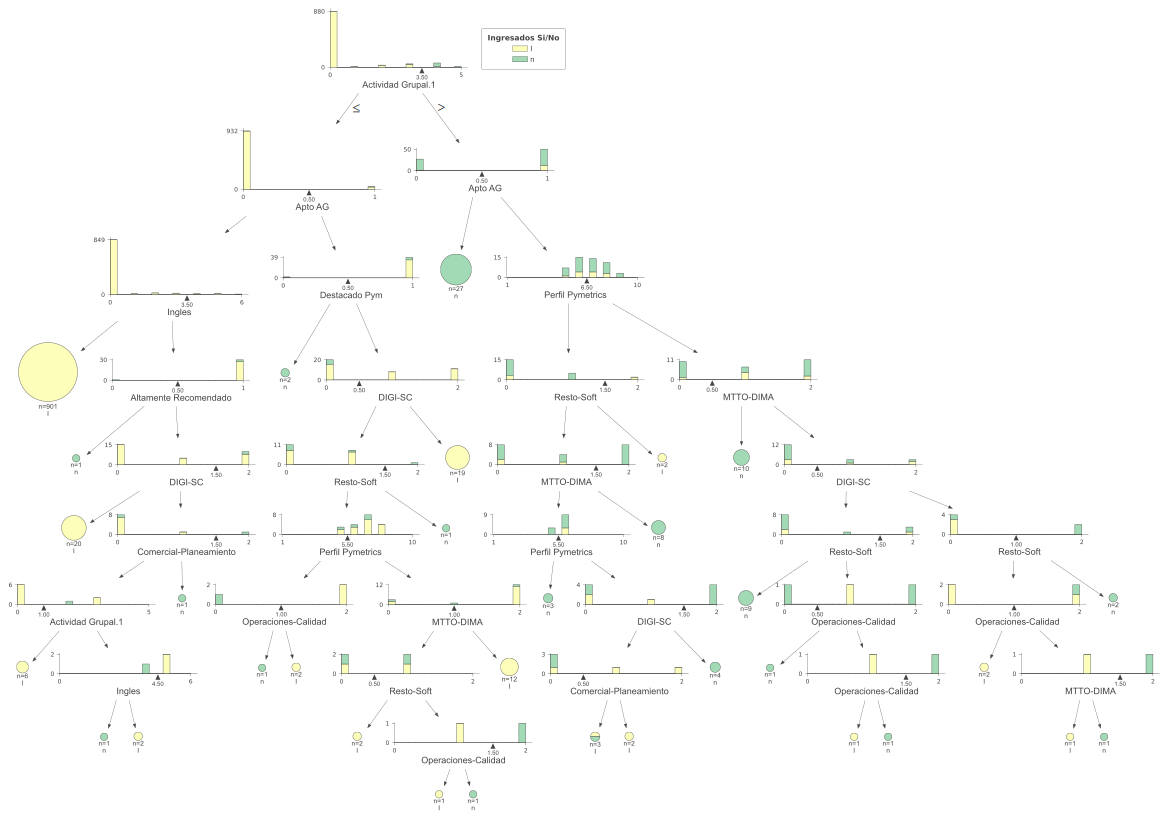

----------------------------------------------------Árbol 2--------------------------------------------------->


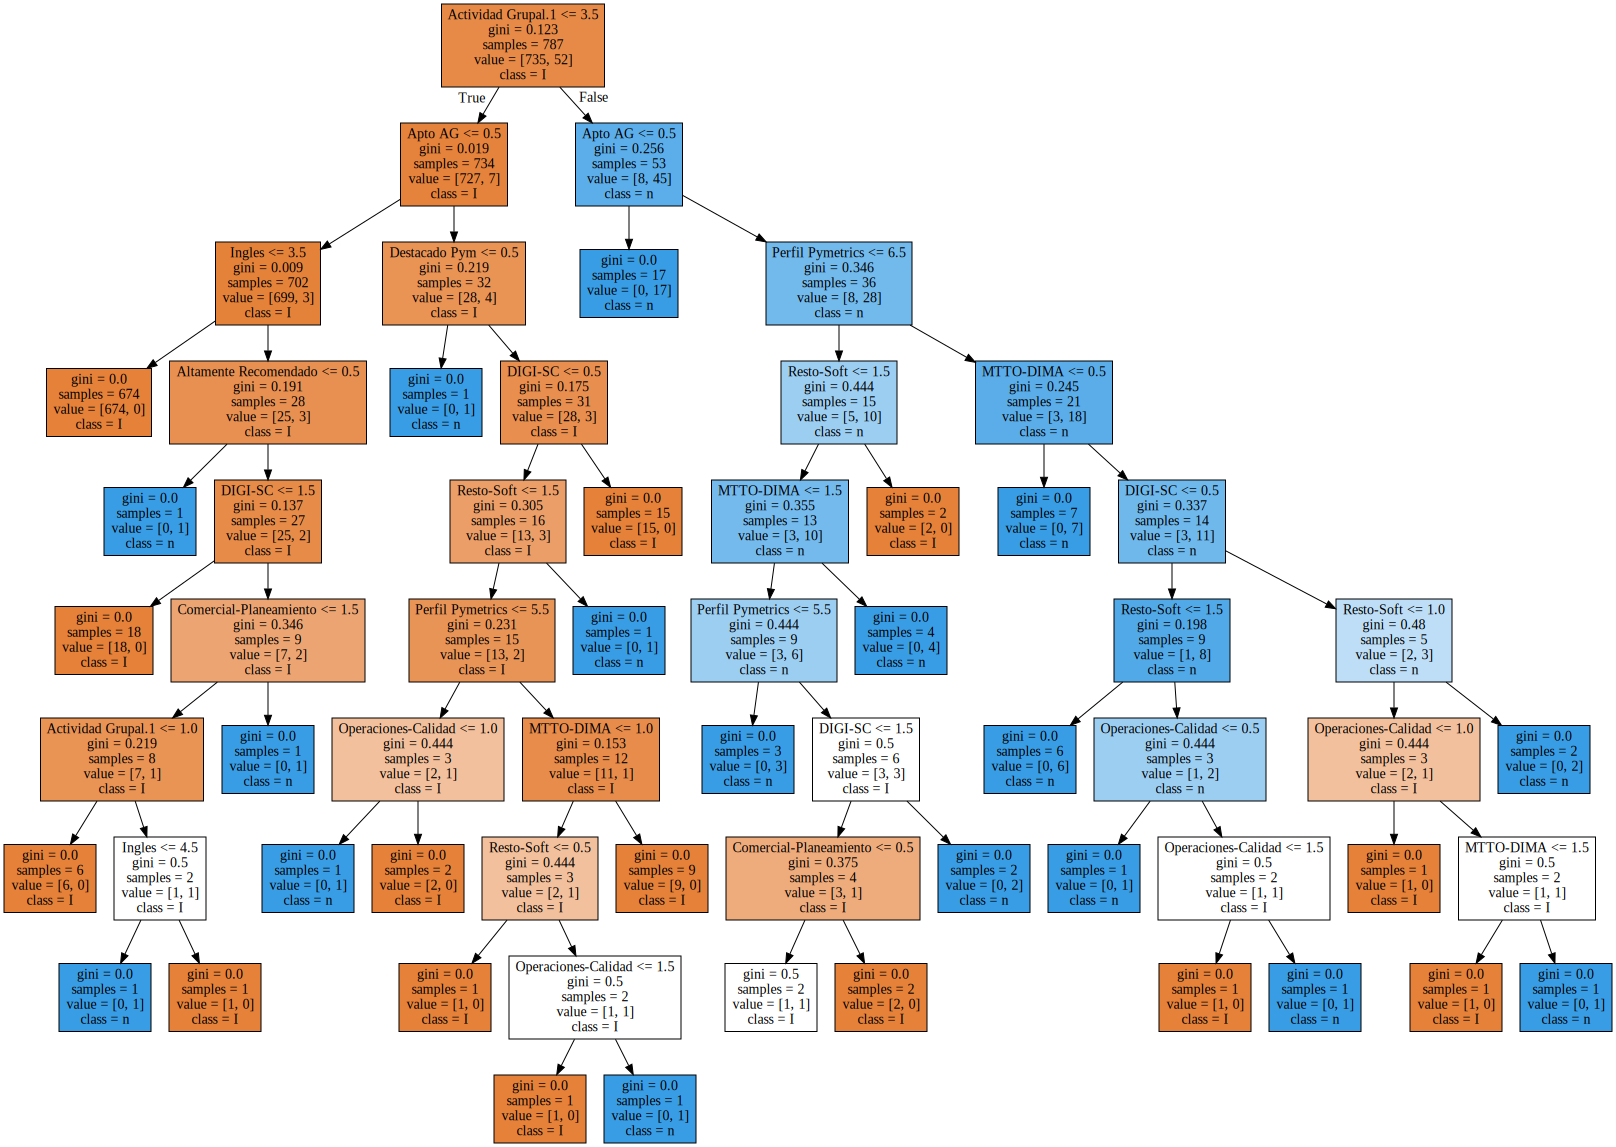

In [13]:
# Importar clasificador
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from dtreeviz.trees import dtreeviz # remember to load the package
from sklearn import tree
import graphviz


# Crear el modelo
DT = DecisionTreeClassifier() 

# Ajustar modelo
DT.fit(X_train, y_train)

# Realizar una predicción
y_pred_DT = DT.predict(X_test) 

# Graficar árboles de decisión
    # Árbol 1
print('----------------------------------------------------Árbol 1--------------------------------------------------->')
viz = dtreeviz(DT, X, y,
                target_name=y.name,
                feature_names=X.columns,
                class_names=y.name)
display(viz)
''''''
    # Árbol 2
print('----------------------------------------------------Árbol 2--------------------------------------------------->')
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.name,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
display(graph)                                

**Gradient Boosting**<a name='M6'></a>

In [14]:
# Importar clasificador
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo
GB = GradientBoostingClassifier() 

# Ajustar modelo
GB.fit(X_train, y_train)

# Realizar una predicción
y_pred_GB = GB.predict(X_test) 

**Random Forest**<a name='M7'></a>

In [15]:
# Importar clasificador
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
RF = RandomForestClassifier() 

# Ajustar modelo
RF.fit(X_train, y_train)

# Realizar una predicción
y_pred_RF = RF.predict(X_test) 

**Neural Network**<a name='M8'></a>

In [16]:
# Importar clasificador
from sklearn.neural_network import MLPClassifier

# Crear el modelo
MLP = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

# Ajustar modelo
MLP.fit(X_train, y_train)

# Realizar una predicción
y_pred_MLP = MLP.predict(X_test) 

### 5.2 Evaluación de modelos <a name='5.2'></a>
Se calcula y utiliza métricas para comparar los modelos.

In [17]:
# Importar librerias
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Accuracy**<a name='E1'></a>

Este es el clasificador más simple y una medida del rendimiento general del modelo. Nótese que no indica el tipo de error de clasificación.

**Matriz de confusión**<a name='E2'></a>

Te da una mejor idea de cómo funciona el clasificador y te da una matriz de 2x2 para las dos clases.

**Precisión**<a name='E3'></a>

Este es el número de ejemplos positivos clasificados correctamente dividido por el número total de ejemplos positivos. Informe cómo exactamente el clasificador predice ocurrencias positivas.

**Sensitividad**<a name='E4'></a>

También conocido como el Factor *Razón de Verdaderos Positivos*, indica cuán *sensible* es el clasificador para detectar casos positivos.

**Especificidad**<a name='E5'></a>

También conocido como el Factor *Razón de Verdaderos Negativos*, indica cuán *sensible* es el clasificador para detectar casos negativos.

In [18]:
# Creamos una variable que almacene los datos para poder compararlos
datas = [[],[],[],[],[],[],[],[]]
count = 0 # Contador

# Etiquetas de los modelos
modelos = [y_pred_KNN,y_pred_NB,y_pred_SVM,y_pred_LR,y_pred_DT,y_pred_GB,y_pred_RF,y_pred_MLP]
names = ['K-Nearest Neighbors','Gaussian Naive-Bayes','Support Vector Machine','Logistic Regression',
         'Decision Tree','Gradient Boosting','Random Forest','Neural Network']

# En un bucle se calculan las métricas del modelo respectivo.
for y_pred in modelos:
    print('\n\n')
    print('----------------------------', names[count], '------------------------------\n')
    #print(y_pred)
    #print(y_test)
    print('Matriz de confusión ->')
    print(metrics.confusion_matrix(y_test, y_pred))
    print('\n')
    
    # save confusion matrix and slice into four pieces
    conf = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = conf[1, 1]
    TN = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    print('Métricas calculadas a partir de una matriz de confusión ->')
    
    # Classification Accuracy
    print('Exactitud: ', (TP + TN) / float(TP + TN + FP + FN))
    print('Exactitud con metrics: ', metrics.accuracy_score(y_test, y_pred))
    datas[count].append((TP + TN) / float(TP + TN + FP + FN))
    datas[count].append(metrics.accuracy_score(y_test, y_pred))

    # Classification Error
    print('Error de clasificación: ', (FP + FN) / float(TP + TN + FP + FN))
    print('Error de clasificación con metrics:' , 1 - metrics.accuracy_score(y_test, y_pred))
    datas[count].append((FP + FN) / float(TP + TN + FP + FN))
    datas[count].append(1 - metrics.accuracy_score(y_test, y_pred))
    
    #Sensitivity
    print('Sensitividad: ', TP / float(FN + TP))
    print('Sensitividad con metrics: ', metrics.recall_score(y_test, y_pred))
    r = metrics.recall_score(y_test, y_pred)
    datas[count].append(TP / float(FN + TP))
    datas[count].append(metrics.recall_score(y_test, y_pred))
    
    # Specificity
    print('Especificidad: ', TN / (TN + FP))
    datas[count].append(TN / (TN + FP))
    
    # False Positive Rate
    print('Tasa de falsos positivos: ', FP / float(TN + FP))
    datas[count].append(FP / float(TN + FP))
    
    # Precision
    print('Precisión: ', metrics.precision_score(y_test, y_pred))
    p = metrics.precision_score(y_test, y_pred)
    datas[count].append(metrics.precision_score(y_test, y_pred))
    
    # F1-score
    print('F1-score: ', 2 / ((1/p) + (1/r)))
    datas[count].append(2 / ((1/p) + (1/r)))

    
    # Curva ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    datas[count].append(fpr)
    datas[count].append(tpr)
    datas[count].append(thresholds)
    
    # AUC
    AUC = metrics.roc_auc_score(y_test, y_pred)
    datas[count].append(AUC)
    
    count = count+1




---------------------------- K-Nearest Neighbors ------------------------------

Matriz de confusión ->
[[237   5]
 [  4  17]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.9657794676806084
Exactitud con metrics:  0.9657794676806084
Error de clasificación:  0.034220532319391636
Error de clasificación con metrics: 0.034220532319391594
Sensitividad:  0.8095238095238095
Sensitividad con metrics:  0.8095238095238095
Especificidad:  0.9793388429752066
Tasa de falsos positivos:  0.02066115702479339
Precisión:  0.7727272727272727
F1-score:  0.7906976744186047



---------------------------- Gaussian Naive-Bayes ------------------------------

Matriz de confusión ->
[[228  14]
 [  0  21]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.9467680608365019
Exactitud con metrics:  0.9467680608365019
Error de clasificación:  0.053231939163498096
Error de clasificación con metrics: 0.05323193916349811
Sensitividad:  1.0
Sensitividad con metri

In [19]:
data = {'K-NN': datas[0],
        'GNB': datas[1],
        'SVC': datas[2],
        'LR': datas[3],
        'TREE': datas[4],
        'GB': datas[5],
        'FOREST': datas[6],
        'NN': datas[7]
        }

dfMetrics = pd.DataFrame(data, index=['Exactitud','Exactitud con metrics','Error de clasificación',
                                     'Error de clasificación con metrics','Sensibilidad',
                                     'Sensitividad con metrics','Especificidad','Tasa de falsos positivos',
                                     'Precisión', 'F1-score','fpr','tpr','thresholds','AUC'])

In [20]:
dfMetrics

,K-NN,GNB,SVC,LR,TREE,GB,FOREST,NN
Exactitud,0.965779,0.946768,0.973384,0.969582,0.969582,0.969582,0.969582,0.961977
Exactitud con metrics,0.965779,0.946768,0.973384,0.969582,0.969582,0.969582,0.969582,0.961977
Error de clasificación,0.0342205,0.0532319,0.026616,0.0304183,0.0304183,0.0304183,0.0304183,0.0380228
Error de clasificación con metrics,0.0342205,0.0532319,0.026616,0.0304183,0.0304183,0.0304183,0.0304183,0.0380228
Sensibilidad,0.809524,1,0.904762,0.857143,0.857143,0.904762,0.904762,0.809524
Sensitividad con metrics,0.809524,1,0.904762,0.857143,0.857143,0.904762,0.904762,0.809524
Especificidad,0.979339,0.942149,0.979339,0.979339,0.979339,0.975207,0.975207,0.975207
Tasa de falsos positivos,0.0206612,0.0578512,0.0206612,0.0206612,0.0206612,0.0247934,0.0247934,0.0247934
Precisión,0.772727,0.6,0.791667,0.782609,0.782609,0.76,0.76,0.73913
F1-score,0.790698,0.75,0.844444,0.818182,0.818182,0.826087,0.826087,0.772727


**ROC**<a name='E6'></a>

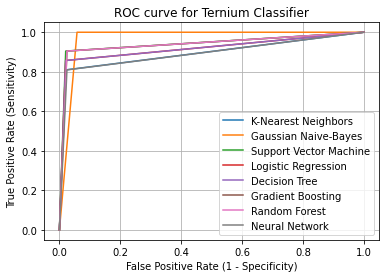

In [21]:
# Generar gráfico
for i in range(0,8):
    plt.plot(datas[i][10], datas[i][11], label=names[i])

plt.title('ROC curve for Ternium Classifier') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.legend()
plt.grid(True)
plt.show()

**AUC**

In [22]:
comp = {'K-NN': datas[0][13],
        'GNB': datas[1][13],
        'SVC': datas[2][13],
        'LR': datas[3][13],
        'TREE': datas[4][13],
        'GB': datas[5][13],
        'FOREST': datas[6][13],
        'NN': datas[7][13]
        }
tabla = pd.DataFrame(comp, index=['AUC'])
tabla

,K-NN,GNB,SVC,LR,TREE,GB,FOREST,NN
AUC,0.894431,0.971074,0.94205,0.918241,0.918241,0.939984,0.939984,0.892365


### 5.3 Ajuste de hiperparámetros de modelos <a name='5.3'></a>
Se realiza ajuste de hiperparámetros de los modelos y se evaluan de nuevo, probando de nuevo los modelos considerando los ajustes realizados.

In [23]:
# Importar librerias
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Crear distribución de cada modelo
distribucion_KNN = dict(n_neighbors=[10,1,10],algorithm=['ball_tree', 'kd_tree'],
                        weights=['uniform', 'distance'])
distribucion_NB = dict(var_smoothing=np.logspace(0,-10, num=50))
distribucion_SVM = dict(kernel=['linear', 'poly'],degree=[3,4,5,6])
distribucion_LR = dict(C=[0,1,2,3,4],penalty=['l2', 'l1'])
distribucion_DT = dict(criterion=['gini','entropy'],max_depth=[8,9,10,11,12,13],
                       max_features=[5,6,7,8,9,10,11,12])
distribucion_GB = dict(loss=['deviance','exponential'],criterion=['squared_error','friedman_mse'])
distribucion_RF = dict(n_estimators=[50,90,120],criterion=['gini','entropy'],)
distribucion_MLP = dict(max_iter=[50,150,250],solver=['adam','lbfgs'],
                        activation=['logistic','relu'])

# Etiquetas para el for
distribuciones = [distribucion_KNN,distribucion_NB,distribucion_SVM,distribucion_LR,
                  distribucion_DT,distribucion_GB,distribucion_RF,distribucion_MLP]
M = [KNN,NB,SVM,LR,DT,GB,RF,MLP]

# Contador
count = 0 
accu = []

# En un bucle ajustar hiperparámetros
for distribucion in distribuciones:
    print('\n\n')
    print('----------------------------', names[count], '------------------------------\n')
    M[count] = RandomizedSearchCV(M[count], distribucion, random_state=0)
    # Ajustar el modelo otra vez
    M[count] = M[count].fit(X_train, y_train)
    print('Los mejores hiperparámetros ->')
    #modelos[count] = M[count].predict(X_test)
    P = M[count].best_params_
    print(P)
    print('Accuracy ->')
    SA = M[count].best_score_
    print(SA)
    accu.append(SA)
    
    count = count+1





---------------------------- K-Nearest Neighbors ------------------------------

Los mejores hiperparámetros ->
{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'ball_tree'}
Accuracy ->
0.9580504716600823



---------------------------- Gaussian Naive-Bayes ------------------------------

Los mejores hiperparámetros ->
{'var_smoothing': 0.15264179671752334}
Accuracy ->
0.9682012416350882



---------------------------- Support Vector Machine ------------------------------

Los mejores hiperparámetros ->
{'kernel': 'poly', 'degree': 3}
Accuracy ->
0.9771103765218093



---------------------------- Logistic Regression ------------------------------

Los mejores hiperparámetros ->
{'penalty': 'l2', 'C': 2}
Accuracy ->
0.9758284286059824



---------------------------- Decision Tree ------------------------------

Los mejores hiperparámetros ->
{'max_features': 9, 'max_depth': 12, 'criterion': 'entropy'}
Accuracy ->
0.9720148351205353



---------------------------- Gradient Boos

In [24]:
# Comparación
lastAccu = []
for i in range(0,8):
    lastAccu.append(datas[i][1])
    
comp = {'Exactitud anterior': lastAccu, 
       'Exactitud hiper parametros': accu
       }
tabla = pd.DataFrame(comp, index=names)

print('COMPARACIÓN')
tabla

COMPARACIÓN


,Exactitud anterior,Exactitud hiper parametros
K-Nearest Neighbors,0.965779,0.958050
Gaussian Naive-Bayes,0.946768,0.968201
Support Vector Machine,0.973384,0.977110
Logistic Regression,0.969582,0.975828
Decision Tree,0.969582,0.972015
Gradient Boosting,0.969582,0.974546
Random Forest,0.969582,0.977102
Neural Network,0.961977,0.969491


### 5.4 Validación cruzada de modelos <a name='5.4'></a>
Se implementa el procedimiento de validación cruzada para los modelos

In [25]:
# Importar libreria
from sklearn.model_selection import cross_val_score

# Creamos una variable que almacene los datos para poder compararlos
cruzada = [[],[],[],[],[],[],[],[]]

# Contador
count = 0

# En un bucle ajustar hiperparámetros
for distribucion in distribuciones:
    cruzada[count].append(cross_val_score(M[count],X,y,cv=10,scoring='roc_auc').mean())
    
    count = count+1

In [26]:
# Comparación
validacion = {'K-Nearest Neighbors': cruzada[0], 
       'Gaussian Naive-Bayes': cruzada[1], 
       'Support Vector Machine': cruzada[2], 
       'Logistic Regression': cruzada[3], 
       'Decision Tree': cruzada[4], 
       'Gradient Boosting': cruzada[5], 
       'Random Forest': cruzada[6], 
       'Neural Network': cruzada[7]}
compval = pd.DataFrame(validacion, index=['Cross Val Score'])
compval

,K-Nearest Neighbors,Gaussian Naive-Bayes,Support Vector Machine,Logistic Regression,Decision Tree,Gradient Boosting,Random Forest,Neural Network
Cross Val Score,0.92182,0.985399,0.976944,0.985914,0.889764,0.987163,0.980435,0.979923


## 6. Conclusión <a name='6'></a>
Se describe el proceso realizado y se presenta una conclusión individual sobre el mismo.

Apartir de los resultados adquiridos, al saber los modelos de clasificación que se vieron en la clase, se desidio correrlos en el modelo con el cual estamos trabajando en equipo, al ejecutarlo varias veces se observo que los mejores modelos que cumplen con lo prometido son los de Support Vector Machine y Random Forest, esto respecto a la precisión, que indica qué tan preciso es el clasificador para predecir casos positivos, de igual forma al realizar ajustes de los hiperparametros de los modelos se llego al mismo resultamdo. Tambien se observo segun las metricas de ROC y AUC que el modelo de Gaussian Naive-Bayes el cual mostro resultados altos al ser analizado. Y finalmente al realizar el cross value score se observo que el Random Forest tiene mayor puntaje que los demas, después de esta le continuan por muy poco el logistic regression y Gradient Boosting. Personalmente creo que el mejor algoritmo segun todas las metricas y metodos utilizados es el de Random forest. 